In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install -U numpy --user

Note: you may need to restart the kernel to use updated packages.


#**1. Reading left and right part images and converting to grayscale**

In [ ]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow

img_1 = cv2.imread('/home/prithvirajnaik/prithvi/images/Image1.png')
print("Image 1:")
cv2.imshow("Image 1:",img_1)
img_1_bw = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread('/home/prithvirajnaik/prithvi/images/Image2.png')
print("Image 2:")
cv2.imshow(img_2)
img_2_bw = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)


#**2. Compute the sift-key points and descriptors for left and right images**

In [26]:
sift = cv2.xfeatures2d.SIFT_create()

# find key points
kp1, des1 = sift.detectAndCompute(img_1_bw,None)
kp2, des2 = sift.detectAndCompute(img_2_bw,None)




#**3. Select the top best matches for each descriptor of an image**

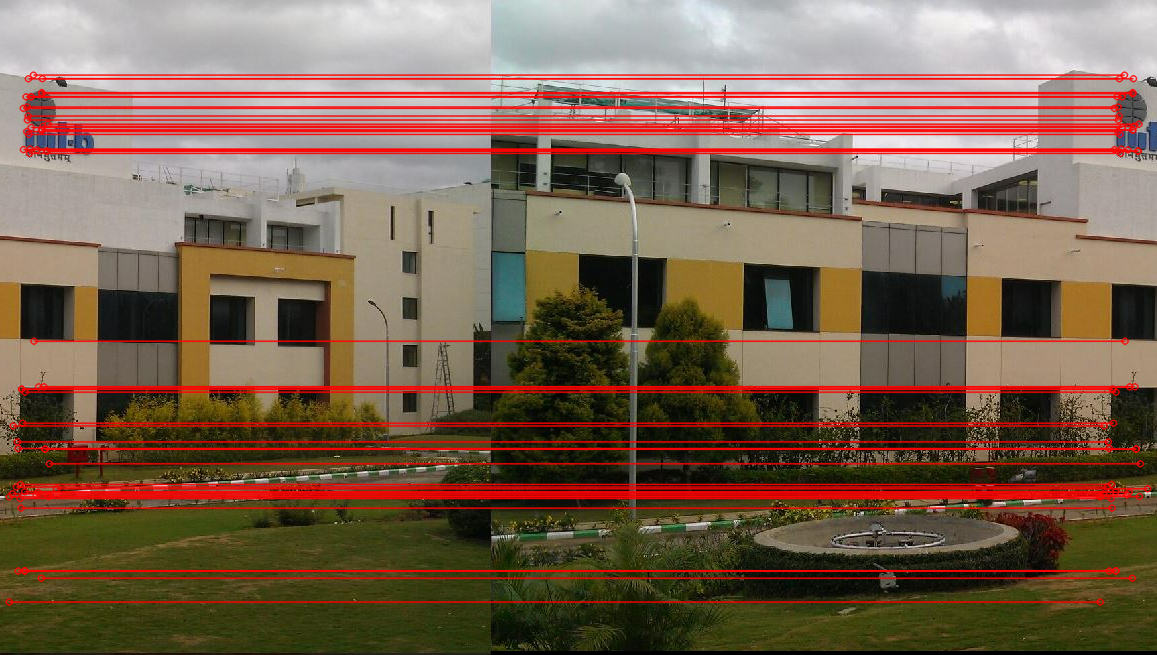

In [27]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,0,255),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(img_1,kp1,img_2,kp2,good,None,**draw_params)
cv2_imshow(img3)




#**4. Run RANSAC to estimate homography**

In [29]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#**5. Warp to align for stitching**


In [31]:
h,w = img_1_bw.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts, M)
img2 = cv2.polylines(img_2_bw,[np.int32(dst)],True,255,3, cv2.LINE_AA)
dst = cv2.warpPerspective(img_1,M,(img_2.shape[1] + img_1.shape[1], img_2.shape[0]))


#**6. Finally, stitch them together.**



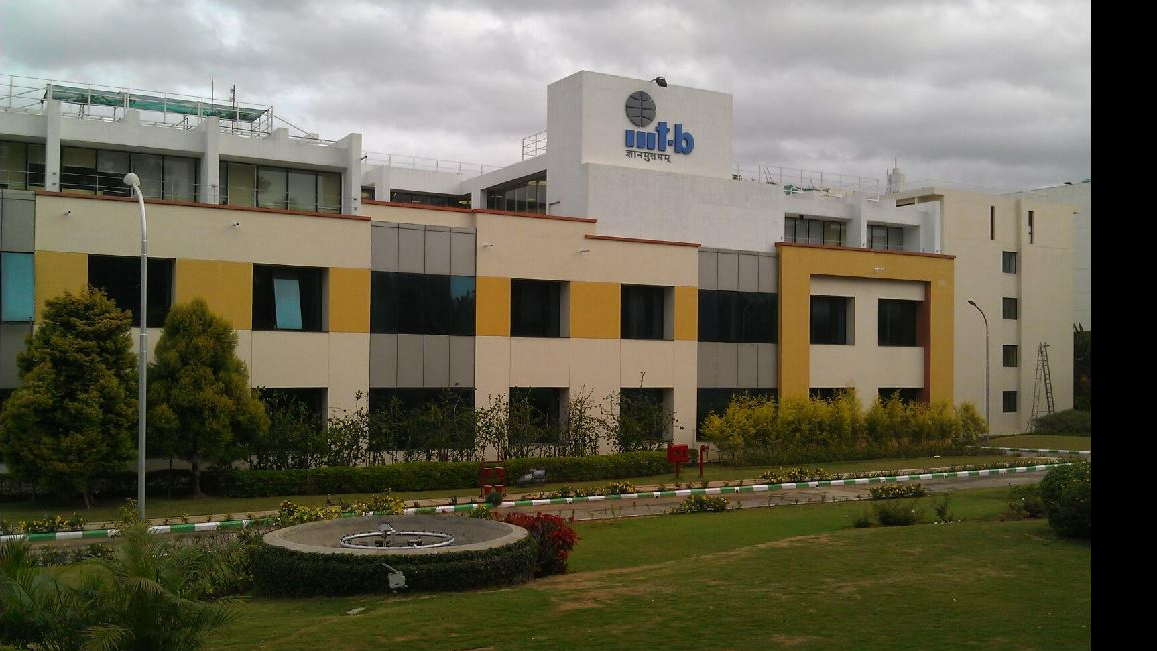

In [32]:
dst[0:img_2.shape[0],0:img_2.shape[1]] = img_2
cv2_imshow(dst)